In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
theoretical = np.fromfile('initial_pk_linear_theo.data', dtype=np.double)
spec = [None]*11
for i in range(11):
	spec[i] = np.zeros(len(theoretical))
	for b in range(100):
		realisation = np.fromfile('Data/' + str(b) + 'spec' + str(i * 100) + '.data', dtype=np.double)
		for s in range(len(realisation)):
			spec[i][s] += realisation[s]
	spec[i] = spec[i] / 100

In [7]:
dofa = np.fromfile('dVals.data', dtype=np.double)
print(len(dofa))
print(len(spec))

11
11


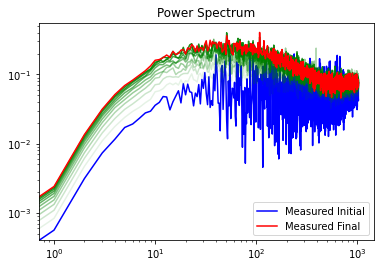

In [20]:
initial = spec[0]
final = spec[-1]
initial[0] = 0.0
final[0] = 0.0
plt.figure()
plt.title('Power Spectrum')
plt.loglog(initial, label='Measured Initial', c='blue')
for i in range(1, len(spec)-1):
	spec[i][0] = 0.0
	plt.loglog(spec[i], c='green', alpha=i*0.1)
plt.loglog(final, label='Measured Final', c='red')
plt.legend()
plt.savefig('measured.png')
plt.show()

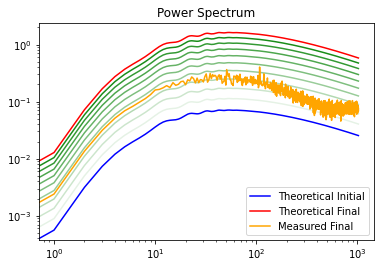

In [21]:
plt.figure()
plt.title('Power Spectrum')
plt.loglog(theoretical, label='Theoretical Initial', c='blue')
for i in range(1, len(spec)-1):
	spec[i][0] = 0.0
	plt.loglog(theoretical*((dofa[i]**2) / (dofa[0]**2)), c='green', alpha=i*0.1)
spec[-1][0] = 0.0
plt.loglog(theoretical*((dofa[-1]**2) / (dofa[0]**2)), label='Theoretical Final', c='red', alpha=(len(spec)-1)*0.1)
plt.loglog(final, label='Measured Final', c='orange')
plt.legend()
plt.savefig('theoretical.png')
plt.show()